In [ ]:
!pip -q install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.7 MB/s eta 0:00:00


In [ ]:
import optuna
import numpy as np
import pandas as pd
import seaborn as sns
from time import time
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import warnings
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import KernelDensity
from sklearn.ensemble import IsolationForest
from sklearn.pipeline import make_pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

warnings.filterwarnings("ignore")
# Set Seaborn theme
sns.set(style='darkgrid')

# Google Drive link to the dataset
DATASET_URL ='https://drive.google.com/uc?id=1boK6_6FNCi9olVwnNA08G_L0mVPz-xMz'

# Variables
COLUMN_NAMES = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
FLOAT_VARS = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
BOOL_VARS = ['sex', 'fbs', 'exang', 'num']
CATEGORICAL_VARS = ['cp', 'restecg', 'slope', 'thal']
TARGET_VAR = 'num'

# Load dataset as DataFrame
data = pd.read_csv(DATASET_URL, header=None, sep=',', names=COLUMN_NAMES)

# clean data with empty cells and cells with "?" and replace it with NaN
data = data.replace(r'^s*$', float('NaN'), regex = True)
data = data.replace("?", float('NaN'))

# replace categorical values
data[TARGET_VAR] = data[TARGET_VAR].replace([1, 2, 3, 4], 1)
data['slope'] = data['slope'].replace([1, 2, 3], [1, 0, -1])

# Assuming 'data' is your DataFrame containing NaN values
iterative_imputer = IterativeImputer(random_state=0)
data_imputed = iterative_imputer.fit_transform(data)

# Create a mask to identify the positions of NaN values in the original DataFrame
nan_mask = data.isna()

# Convert the NumPy array 'data_imputed' back to a pandas DataFrame
data = pd.DataFrame(data_imputed, columns=COLUMN_NAMES)

# Round only the imputed values to the nearest decimal
data[nan_mask] = data[nan_mask].apply(lambda x: np.abs(x)).round(0)

# output data
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,-1.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,0.0,3.0,3.0,1.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,0.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,-1.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,0.0,0.0,7.0,1.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,0.0,2.0,7.0,1.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,0.0,1.0,7.0,1.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,0.0,1.0,3.0,1.0


## Data Preparation

In [ ]:
# prepare data
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

NameError: ignored

## Anomaly Detection

In [ ]:
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import DBSCAN
from sklearn.svm import OneClassSVM

# Filter the data to only 2-feautures.
X_train_ = make_pipeline(StandardScaler(),
                  PCA(n_components=2)).fit_transform(X_train)

# Make a meshgrid for plotting surfaces
x_min, x_max = X_train_[:, 0].min() - 1, X_train_[:, 0].max() + 1
y_min, y_max = X_train_[:, 1].min() - 1, X_train_[:, 1].max() + 1

Xp, Yp = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))
XY = np.vstack([Xp.ravel(), Yp.ravel()]).T

isoforest = IsolationForest(contamination=0.1).fit(X_train_)
Zp = isoforest.score_samples(XY)
Zp = Zp.reshape(Xp.shape)

# Get the anomalous data points
y_pred = isoforest.predict(X_train_)
normals = X_train_[y_pred == 1,:]
anomals = X_train_[y_pred == -1,:]

cntr = plt.contourf(Xp, Yp, Zp, levels=20, cmap='viridis')
plt.scatter(normals[:,0], normals[:,1], s=5, color='k', label='Normal Observations')
plt.scatter(anomals[:,0], anomals[:,1], s=5, color='r', label='Anomalies (Contamination = 0.1)')
plt.title('Anomaly Detection using Isolation Forest')
plt.colorbar(cntr)
plt.legend()
plt.grid()
plt.show()

# ========
X_train = X_train[y_pred == 1]
y_train = y_train[y_pred == 1]

NameError: ignored

In [ ]:
# Load X_train from CSV
X_train = pd.read_csv("/content/drive/MyDrive/Course Materials/AI 221 - Classical Machine Learning/Project/data/X_train.csv", sep=',')
X_test = pd.read_csv("/content/drive/MyDrive/Course Materials/AI 221 - Classical Machine Learning/Project/data/X_test.csv", sep=',')
y_train = pd.read_csv("/content/drive/MyDrive/Course Materials/AI 221 - Classical Machine Learning/Project/data/y_train.csv", sep=',')
y_test = pd.read_csv("/content/drive/MyDrive/Course Materials/AI 221 - Classical Machine Learning/Project/data/y_test.csv", sep=',')


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, make_scorer,  confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

# create an OptunaAutoML Class
class AutoMLOptuna:
    """
    An AutoML Algorithm to search for the best algorithm for binary classification
    of heart attack. Some features include SVC, XGBoost, SVM, LDA, RandomForest. Neural Network
    Naive Bays, and Decision Trees
    """
    def __init__(self, X_train, X_test, y_train, y_test, models = None):
        """
        X: Input raw data to be processed.
        y: Input binary classification of 0 and 1.
        models: input which model to use
        """
        self.X_train, self.X_test, self.y_train, self.y_test = X_train, X_test, y_train, y_test
        self.models = models

    def create_model(self, trial, models = None):
        # Select feature scaler
        scalers = {'minmax': MinMaxScaler(), 'standard': StandardScaler(), 'robust': RobustScaler()}
        s = trial.suggest_categorical('scaler', scalers.keys())

        # Column transformer
        transformer = ColumnTransformer([
            ('scaler', scalers[s], FLOAT_VARS),
            ('encoder', OneHotEncoder(), CATEGORICAL_VARS)],
            remainder='passthrough')

        if self.models is None:
          self.models = ['LogisticRegression', 'NaiveBayes', 'DecisionTree', 'RandomForest',
                    'SVM', 'KNN', 'GBM', 'XGBoost', 'NeuralNetwork', 'AdaBoost', 'XGB-RF']
        # Select classifier
        model_type = trial.suggest_categorical('model_type', self.models)

        if model_type == 'LogisticRegression':
            penalty = trial.suggest_categorical('penalty', ['l2', 'l1'])
            solver = 'saga' if penalty == 'l1' else 'lbfgs'
            regularization = trial.suggest_float('Logistic-regularization', 0.01, 500, log=True)
            model = LogisticRegression(penalty=penalty, C=regularization, solver=solver)

        elif model_type == 'NaiveBayes':
            model = GaussianNB()

        elif model_type == 'DecisionTree':
            # Define hyperparameter search space
            max_depth = trial.suggest_int('max_depth', 1, 32)
            min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0)
            min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5)


            model = DecisionTreeClassifier(max_depth=max_depth,
                                           min_samples_split=min_samples_split,
                                           min_samples_leaf=min_samples_leaf)

        elif model_type == 'RandomForest':
            n_estimators = trial.suggest_int('n_estimators', 50, 1000)
            max_depth = trial.suggest_int('max_depth', 1, 10)
            model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, n_jobs = -1)

        elif model_type == 'SVM':
            C = trial.suggest_float('C', 1e-4, 1e4, log=True)
            gamma = trial.suggest_float('gamma', 1e-4, 1e4, log=True)
            kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])
            degree = trial.suggest_int('degree', 1, 5)  # For 'poly' kernel
            coef0 = trial.suggest_float('coef0', -1.0, 1.0)  # For 'poly' and 'sigmoid' kernels

            # Create the SVC model with hyperparameters suggested by Optuna
            model = SVC(C=C, gamma=gamma, kernel=kernel, degree=degree, coef0=coef0)

        elif model_type == 'SVC-Bagging':

            bagging_fraction = trial.suggest_float('bagging_fraction', 0.1, 1.0)
            estimators = trial.suggest_int('n_estimators', 1, 20)

            # Create the BaggingClassifier with the SVM as the base estimator
            model = BaggingClassifier(estimator=SVC(), n_estimators=estimators, max_samples=bagging_fraction)

        elif model_type == 'KNN-Bagging':

            bagging_fraction = trial.suggest_float('bagging_fraction', 0.1, 1.0)
            estimators = trial.suggest_int('n_estimators', 1, 20)

            # Create the BaggingClassifier with the SVM as the base estimator
            model = BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=estimators, max_samples=bagging_fraction)

        elif model_type == 'KNN':
            # Define the search space for hyperparameters
            n_neighbors = trial.suggest_int('n_neighbors', 1, 20)
            weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
            p = trial.suggest_categorical('p', [1, 2])  # L1 or L2 distance metric
            leaf_size = trial.suggest_int('leaf_size', 10, 50)
            algorithm = trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute'])

            # Create the KNN model with the sampled hyperparameters
            model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p=p)

        elif model_type == 'GBM':
            learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1, log=True)
            n_estimators = trial.suggest_int('n_estimators', 50, 1000)
            max_depth = trial.suggest_int('max_depth', 1, 20)
            model = GradientBoostingClassifier(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth)
        elif model_type == 'MLP':
            hidden_layer_sizes = trial.suggest_int('hidden_layer_sizes', 1, 10, step=1)
            activation = trial.suggest_categorical('activation', ['relu', 'tanh', 'logistic'])
            solver = trial.suggest_categorical('solver', ['adam', 'sgd'])
            alpha = trial.suggest_float('alpha', 1e-5, 1e-2, log=True)

            model = MLPClassifier(
                hidden_layer_sizes=hidden_layer_sizes,
                activation=activation,
                solver=solver,
                alpha=alpha
            )
        elif model_type == 'NeuralNetwork':
            hidden_layer_sizes = trial.suggest_categorical('hidden_layer_sizes', ['1x100', '2x100']) #'2x100', '3x100'
            if hidden_layer_sizes == '1x100':
                hidden_layer_sizes = (100,)
            elif hidden_layer_sizes == '2x100':
                hidden_layer_sizes = (100, 100)
            activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
            solver = trial.suggest_categorical('solver', ['adam', 'sgd'])
            model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver)

        elif model_type == 'XGBoost':
            learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1, log=True)
            n_estimators = trial.suggest_int('n_estimators', 50, 1000)
            max_depth = trial.suggest_int('max_depth', 1, 10)
            model = XGBClassifier(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth, n_jobs = -1)

        elif model_type == 'AdaBoost':

            n_estimators = trial.suggest_int('n_estimators', 50, 1000)
            learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1, log=True)

            # Hyperparameters specific to AdaBoost
            base_estimator = trial.suggest_categorical('base_estimator', ['decision_tree', 'svm', 'random_forest'])
            if base_estimator == 'decision_tree':
                max_depth = trial.suggest_int('max_depth', 1, 10)
                base_model = DecisionTreeClassifier(max_depth=max_depth)
            elif base_estimator == 'svm':
                # You can add SVM specific parameters here
                C = trial.suggest_float('C', 1e-4, 1e+3, log=True)
                kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf'])
                base_model = SVC(C=C, kernel=kernel)
            else:
                # You can add Random Forest specific parameters here
                n_estimators_rf = trial.suggest_int('n_estimators_rf', 50, 500)
                max_depth_rf = trial.suggest_int('max_depth_rf', 1, 10)
                base_model = RandomForestClassifier(n_estimators=n_estimators_rf, max_depth=max_depth_rf)

            # Create an AdaBoost model with the suggested hyperparameters
            model = AdaBoostClassifier(
                base_estimator=base_model,
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                random_state=42  # Set a random state for reproducibility
            )

        elif model_type == 'XGB-RF':

            params = {
                'objective': 'binary:logistic',
                'eval_metric': 'logloss',
                'booster': 'gbtree',
                'verbosity': 0,
                'n_jobs': -1,
                'eta': trial.suggest_float('eta', 0.001, 0.1, log=True),
                'max_depth': trial.suggest_int('max_depth', 3, 10),
                'subsample': trial.suggest_float('subsample', 0.5, 1.0),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
                'lambda': trial.suggest_float('lambda', 0.001, 10.0),
                'alpha': trial.suggest_float('alpha', 0.001, 10.0, log=True),
                'gamma': trial.suggest_float('gamma', 0.001, 10.0, log=True),
                'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
            }

            model = XGBRFClassifier(**params)


        if trial.should_prune():
            raise optuna.TrialPruned()

        # Create pipeline with column transformer and suggested model
        pipeline = Pipeline([
            ('transformer', transformer),
            ('model', model)
        ])

        return pipeline

    def objective(self, trial):
        """
        Define the objective func. as the 5-fold corss-validation score
        trial : number of trials
        """
        model = self.create_model(trial)
        scorer = make_scorer(accuracy_score)
        scores = cross_val_score(model, self.X_train, self.y_train, cv=5, scoring=scorer)
        return np.mean(scores)

    def AutoML_test(self):
        """
        AutoML test function to find the best optimized
        """
        start = time()
        study = optuna.create_study(direction='maximize')
        study.optimize(self.objective, n_trials=300)
        best_params = study.best_params
        print("\n\nBest parameters: ", best_params)

        best_model = self.create_model(study.best_trial)
        best_model.fit(self.X_train, self.y_train)

        scores = cross_val_score(best_model, self.X_train, self.y_train, cv=5)
        print("Best cross-validation score: %.5f" % np.mean(scores))
        y_pred = best_model.predict(self.X_test)
        print("Accuracy on test data: %.5f" % accuracy_score(self.y_test,y_pred))
        print("Precision: %.5f" % precision_score(self.y_test, y_pred))
        print("Recall %.5f" %recall_score(self.y_test,y_pred))
        print("F1-score %.5f" % f1_score(self.y_test,y_pred))
        total_time = time()-start
        print("Runtime: %.4f sec" % total_time)


In [ ]:
info = [] #input all data including the model and its values

### Multilayer Pereceptron

In [ ]:
# MLP
mlp = AutoMLOptuna(X_train, X_test, y_train, y_test, models = ['MLP'])
mlp.AutoML_test()

[I 2023-08-18 01:00:48,347] A new study created in memory with name: no-name-7c1900b2-be02-4e30-9ea4-562443dd40e6
[I 2023-08-18 01:00:49,389] Trial 0 finished with value: 0.7986585365853658 and parameters: {'scaler': 'robust', 'model_type': 'MLP', 'hidden_layer_sizes': 8, 'activation': 'tanh', 'solver': 'adam', 'alpha': 4.201120220468053e-05}. Best is trial 0 with value: 0.7986585365853658.
[I 2023-08-18 01:00:50,040] Trial 1 finished with value: 0.5539024390243903 and parameters: {'scaler': 'robust', 'model_type': 'MLP', 'hidden_layer_sizes': 6, 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.0016780041475962092}. Best is trial 0 with value: 0.7986585365853658.
[I 2023-08-18 01:00:50,685] Trial 2 finished with value: 0.7495121951219512 and parameters: {'scaler': 'standard', 'model_type': 'MLP', 'hidden_layer_sizes': 5, 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0017839526715020576}. Best is trial 0 with value: 0.7986585365853658.
[I 2023-08-18 01:00:51,177] Trial 3 finis



Best parameters:  {'scaler': 'minmax', 'model_type': 'MLP', 'hidden_layer_sizes': 8, 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001335982857818968}
Best cross-validation score: 0.78890
Accuracy on test data: 0.89474
Precision: 0.89189
Recall 0.89189
F1-score 0.89189
Runtime: 226.7125 sec


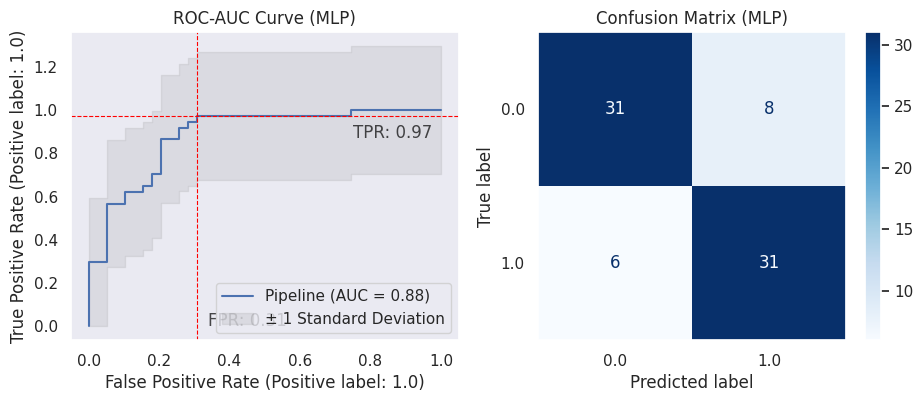

Accuracy: 0.8158
Precision: 0.7949
Recall: 0.8378
F1-Score: 0.8158


In [ ]:
# MLP
params = {'hidden_layer_sizes': 8,
          'activation': 'relu',
          'solver': 'adam',
          'alpha': 0.0001335982857818968
         }

# MLP
model = MLPClassifier(**params)


# Instantiate the bagging classifier with SVM as the base estimator
pipeline = make_pipeline(
    MinMaxScaler(),
    model
)


# Fit the bagging SVM on the training data
pipeline.fit(X_train, y_train)

# Predict the labels for the test data
predictions = pipeline.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Plot ROC Curve
fig, axs = plt.subplots(1, 2, figsize=(11, 4))
roc_auc = roc_auc_score(y_test, predictions)
roc_display = RocCurveDisplay.from_estimator(pipeline, X_test, y_test, ax=axs[0])

# Calculate mean and standard deviation
mean_tpr = roc_display.tpr
std_tpr = np.std(roc_display.tpr)
mean_fpr = roc_display.fpr

optimal_tpr = mean_tpr[np.argmax(mean_tpr - mean_fpr)]
optimal_fpr = mean_fpr[np.argmax(mean_tpr - mean_fpr)]

# Plot vertical and horizontal red lines
axs[0].axhline(y=optimal_tpr, color='red',lw=0.8,linestyle='--')
axs[0].text(0.75, optimal_tpr - 0.1, f'TPR: {optimal_tpr:.2f}', color='black', alpha = 0.7)

axs[0].axvline(x=optimal_fpr, color='red',lw=0.8, linestyle='--')
axs[0].text(optimal_fpr + 0.03, 0, f'FPR: {optimal_fpr:.2f}', color='black', alpha = 0.7)

# Calculate upper and lower bounds for the shaded region
upper_tpr = (mean_tpr + std_tpr)
lower_tpr = np.maximum(mean_tpr - std_tpr, 0)

# Fill between the standard deviation bounds
axs[0].fill_between(mean_fpr, lower_tpr, upper_tpr, color='grey', alpha=0.15, label='± 1 Standard Deviation')
# Add text annotations for mean values
axs[0].grid(None)

# information
axs[0].legend(loc='lower right')
axs[0].set_title('ROC-AUC Curve (MLP)')

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, ax=axs[1],cmap='Blues')
axs[1].set_title('Confusion Matrix (MLP)')
plt.grid(None)
plt.show()

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

info.append(['MLP',[accuracy,precision,recall,f1]])

### K-Nearest Neighbor

In [ ]:
# KNN
knn = AutoMLOptuna(X_train, X_test, y_train, y_test, models = ['KNN'])
knn.AutoML_test()

[I 2023-09-06 06:58:38,744] A new study created in memory with name: no-name-f835094a-1cc2-44cc-86af-6c8552a6592a
[I 2023-09-06 06:58:39,050] Trial 0 finished with value: 0.7842682926829269 and parameters: {'scaler': 'minmax', 'model_type': 'KNN', 'n_neighbors': 3, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 0.7842682926829269.
[I 2023-09-06 06:58:39,378] Trial 1 finished with value: 0.8135365853658536 and parameters: {'scaler': 'minmax', 'model_type': 'KNN', 'n_neighbors': 9, 'weights': 'uniform', 'p': 1}. Best is trial 1 with value: 0.8135365853658536.
[I 2023-09-06 06:58:39,834] Trial 2 finished with value: 0.7353658536585366 and parameters: {'scaler': 'robust', 'model_type': 'KNN', 'n_neighbors': 1, 'weights': 'distance', 'p': 2}. Best is trial 1 with value: 0.8135365853658536.
[I 2023-09-06 06:58:40,145] Trial 3 finished with value: 0.803780487804878 and parameters: {'scaler': 'minmax', 'model_type': 'KNN', 'n_neighbors': 11, 'weights': 'uniform', 'p': 1}. Best is t



Best parameters:  {'scaler': 'minmax', 'model_type': 'KNN', 'n_neighbors': 12, 'weights': 'distance', 'p': 1}
Best cross-validation score: 0.82329
Accuracy on test data: 0.90789
Precision: 0.89474
Recall 0.91892
F1-score 0.90667
Runtime: 56.2925 sec


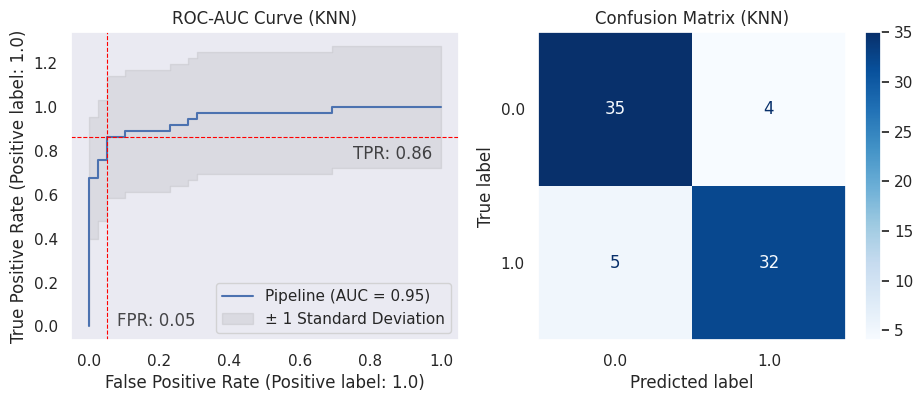

Accuracy: 0.8816
Precision: 0.8889
Recall: 0.8649
F1-Score: 0.8767


In [ ]:
# KNN
params = {'n_neighbors': 12,
          'weights': 'distance',
          'p': 1
         }

# KNN
model = KNeighborsClassifier(**params)


# Instantiate the bagging classifier with SVM as the base estimator
pipeline = make_pipeline(
    MinMaxScaler(),
    model
)


# Fit the bagging SVM on the training data
pipeline.fit(X_train, y_train)

# Predict the labels for the test data
predictions = pipeline.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Plot ROC Curve
fig, axs = plt.subplots(1, 2, figsize=(11, 4))
roc_auc = roc_auc_score(y_test, predictions)
roc_display = RocCurveDisplay.from_estimator(pipeline, X_test, y_test, ax=axs[0])

# Calculate mean and standard deviation
mean_tpr = roc_display.tpr
std_tpr = np.std(roc_display.tpr)
mean_fpr = roc_display.fpr

optimal_tpr = mean_tpr[np.argmax(mean_tpr - mean_fpr)]
optimal_fpr = mean_fpr[np.argmax(mean_tpr - mean_fpr)]

# Plot vertical and horizontal red lines
axs[0].axhline(y=optimal_tpr, color='red',lw=0.8,linestyle='--')
axs[0].text(0.75, optimal_tpr - 0.1, f'TPR: {optimal_tpr:.2f}', color='black', alpha = 0.7)

axs[0].axvline(x=optimal_fpr, color='red',lw=0.8, linestyle='--')
axs[0].text(optimal_fpr + 0.03, 0, f'FPR: {optimal_fpr:.2f}', color='black', alpha = 0.7)

# Calculate upper and lower bounds for the shaded region
upper_tpr = (mean_tpr + std_tpr)
lower_tpr = np.maximum(mean_tpr - std_tpr, 0)

# Fill between the standard deviation bounds
axs[0].fill_between(mean_fpr, lower_tpr, upper_tpr, color='grey', alpha=0.15, label='± 1 Standard Deviation')
# Add text annotations for mean values
axs[0].grid(None)

# information
axs[0].legend(loc='lower right')
axs[0].set_title('ROC-AUC Curve (KNN)')

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, ax=axs[1],cmap='Blues')
axs[1].set_title('Confusion Matrix (KNN)')
plt.grid(None)
plt.show()

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

info.append(['KNN',[accuracy,precision,recall,f1]])

### Naive Bayes

In [ ]:
# NaiveBayes
nb = AutoMLOptuna(X_train, X_test, y_train, y_test, models = ['NaiveBayes'])
nb.AutoML_test()

[I 2023-09-06 07:06:55,024] A new study created in memory with name: no-name-3c74df9c-26b3-4135-a479-fdcb0aa261ad
[I 2023-09-06 07:06:55,217] Trial 0 finished with value: 0.7939024390243902 and parameters: {'scaler': 'robust', 'model_type': 'NaiveBayes'}. Best is trial 0 with value: 0.7939024390243902.
[I 2023-09-06 07:06:55,368] Trial 1 finished with value: 0.7939024390243902 and parameters: {'scaler': 'minmax', 'model_type': 'NaiveBayes'}. Best is trial 0 with value: 0.7939024390243902.
[I 2023-09-06 07:06:55,534] Trial 2 finished with value: 0.7939024390243902 and parameters: {'scaler': 'standard', 'model_type': 'NaiveBayes'}. Best is trial 0 with value: 0.7939024390243902.
[I 2023-09-06 07:06:55,706] Trial 3 finished with value: 0.7939024390243902 and parameters: {'scaler': 'robust', 'model_type': 'NaiveBayes'}. Best is trial 0 with value: 0.7939024390243902.
[I 2023-09-06 07:06:55,886] Trial 4 finished with value: 0.7939024390243902 and parameters: {'scaler': 'robust', 'model_type



Best parameters:  {'scaler': 'robust', 'model_type': 'NaiveBayes'}
Best cross-validation score: 0.79390
Accuracy on test data: 0.90789
Precision: 0.89474
Recall 0.91892
F1-score 0.90667
Runtime: 37.6253 sec


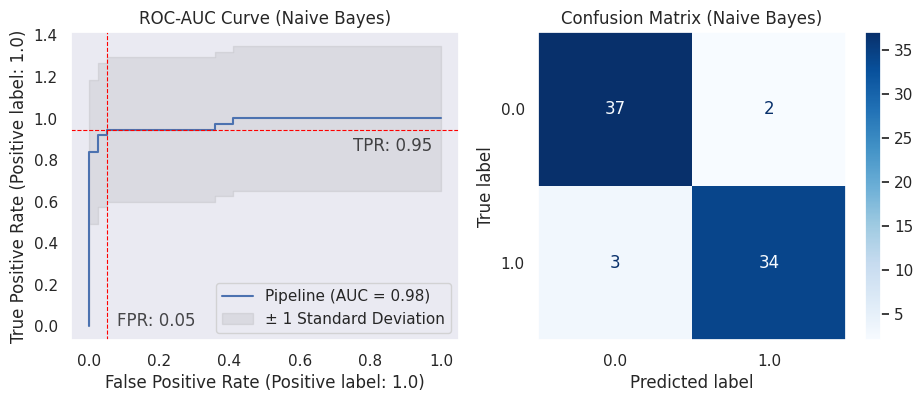

Accuracy: 0.9342
Precision: 0.9444
Recall: 0.9189
F1-Score: 0.9315


In [ ]:
# NaiveBayes

model = GaussianNB()


# Instantiate the bagging classifier with SVM as the base estimator
pipeline = make_pipeline(
    RobustScaler(),
    model
)


# Fit the bagging SVM on the training data
pipeline.fit(X_train, y_train)

# Predict the labels for the test data
predictions = pipeline.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Plot ROC Curve
fig, axs = plt.subplots(1, 2, figsize=(11, 4))
roc_auc = roc_auc_score(y_test, predictions)
roc_display = RocCurveDisplay.from_estimator(pipeline, X_test, y_test, ax=axs[0])

# Calculate mean and standard deviation
mean_tpr = roc_display.tpr
std_tpr = np.std(roc_display.tpr)
mean_fpr = roc_display.fpr

optimal_tpr = mean_tpr[np.argmax(mean_tpr - mean_fpr)]
optimal_fpr = mean_fpr[np.argmax(mean_tpr - mean_fpr)]

# Plot vertical and horizontal red lines
axs[0].axhline(y=optimal_tpr, color='red',lw=0.8,linestyle='--')
axs[0].text(0.75, optimal_tpr - 0.1, f'TPR: {optimal_tpr:.2f}', color='black', alpha = 0.7)

axs[0].axvline(x=optimal_fpr, color='red',lw=0.8, linestyle='--')
axs[0].text(optimal_fpr + 0.03, 0, f'FPR: {optimal_fpr:.2f}', color='black', alpha = 0.7)

# Calculate upper and lower bounds for the shaded region
upper_tpr = (mean_tpr + std_tpr)
lower_tpr = np.maximum(mean_tpr - std_tpr, 0)

# Fill between the standard deviation bounds
axs[0].fill_between(mean_fpr, lower_tpr, upper_tpr, color='grey', alpha=0.15, label='± 1 Standard Deviation')
# Add text annotations for mean values
axs[0].grid(None)

# information
axs[0].legend(loc='lower right')
axs[0].set_title('ROC-AUC Curve (Naive Bayes)')

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, ax=axs[1],cmap='Blues')
axs[1].set_title('Confusion Matrix (Naive Bayes)')
plt.grid(None)
plt.show()

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

info.append(['NaiveBayes',[accuracy,precision,recall,f1]])

In [ ]:
# SVM
svm = AutoMLOptuna(X_train, X_test, y_train, y_test, models = ['SVM'])
svm.AutoML_test()

[I 2023-08-18 02:12:19,380] A new study created in memory with name: no-name-52408b5d-f28f-4c5a-8273-c5f3da368fd2
[I 2023-08-18 02:12:19,802] Trial 0 finished with value: 0.5490243902439025 and parameters: {'scaler': 'minmax', 'model_type': 'SVM', 'C': 0.0022427016448390907, 'gamma': 0.0024900320602130035, 'kernel': 'linear', 'degree': 5, 'coef0': 0.006891004995208894}. Best is trial 0 with value: 0.5490243902439025.
[I 2023-08-18 02:12:27,254] Trial 1 finished with value: 0.7792682926829269 and parameters: {'scaler': 'robust', 'model_type': 'SVM', 'C': 627.2018075505341, 'gamma': 14.28242665812972, 'kernel': 'linear', 'degree': 5, 'coef0': -0.8370652049794634}. Best is trial 1 with value: 0.7792682926829269.
[I 2023-08-18 02:12:27,678] Trial 2 finished with value: 0.5490243902439025 and parameters: {'scaler': 'standard', 'model_type': 'SVM', 'C': 0.0015364918547623803, 'gamma': 70.60490810023998, 'kernel': 'rbf', 'degree': 2, 'coef0': 0.964963550230961}. Best is trial 1 with value: 0.



Best parameters:  {'scaler': 'robust', 'model_type': 'SVM', 'C': 0.01204566445947836, 'gamma': 0.014076965632250223, 'kernel': 'linear', 'degree': 4, 'coef0': -0.44482428166147864}
Best cross-validation score: 0.82317
Accuracy on test data: 0.94737
Precision: 1.00000
Recall 0.89189
F1-score 0.94286
Runtime: 188.8381 sec


### SVM

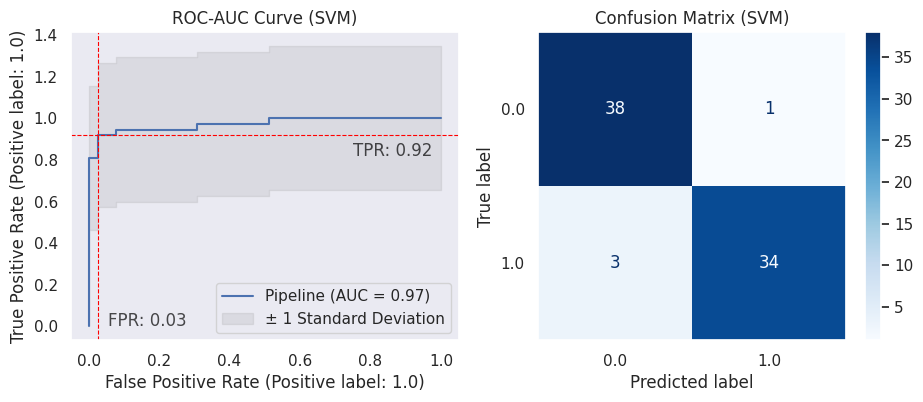

Accuracy: 0.9474
Precision: 0.9714
Recall: 0.9189
F1-Score: 0.9444


In [ ]:
# SVC
params = { 'C': 0.007735050217239773,
           'gamma': 0.014076965632250223,
           'degree': 4,
           'kernel': 'linear',
           'coef0': -0.44482428166147864
         }

model = SVC(**params)

# Instantiate the bagging classifier with SVM as the base estimator
svc = make_pipeline(
    StandardScaler(),
    model
)


# Fit the bagging SVM on the training data
svc.fit(X_train, y_train)

# Predict the labels for the test data
predictions = svc.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

fig, axs = plt.subplots(1, 2, figsize=(11, 4))
roc_auc = roc_auc_score(y_test, predictions)
roc_display = RocCurveDisplay.from_estimator(svc, X_test, y_test, ax=axs[0])


# Calculate mean and standard deviation
mean_tpr = roc_display.tpr
std_tpr = np.std(roc_display.tpr)
mean_fpr = roc_display.fpr

optimal_tpr = mean_tpr[np.argmax(mean_tpr - mean_fpr)]
optimal_fpr = mean_fpr[np.argmax(mean_tpr - mean_fpr)]

# Plot vertical and horizontal red lines
axs[0].axhline(y=optimal_tpr, color='red',lw=0.8,linestyle='--')
axs[0].text(0.75, optimal_tpr - 0.1, f'TPR: {optimal_tpr:.2f}', color='black', alpha = 0.7)

axs[0].axvline(x=optimal_fpr, color='red',lw=0.8, linestyle='--')
axs[0].text(optimal_fpr + 0.03, 0, f'FPR: {optimal_fpr:.2f}', color='black', alpha = 0.7)

# Calculate upper and lower bounds for the shaded region
upper_tpr = (mean_tpr + std_tpr)
lower_tpr = np.maximum(mean_tpr - std_tpr, 0)

# Fill between the standard deviation bounds
axs[0].fill_between(mean_fpr, lower_tpr, upper_tpr, color='grey', alpha=0.15, label='± 1 Standard Deviation')
# Add text annotations for mean values
axs[0].grid(None)

# information
axs[0].legend(loc='lower right')
axs[0].set_title('ROC-AUC Curve (SVM)')

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test, ax=axs[1],cmap='Blues')
axs[1].set_title('Confusion Matrix (SVM)')
plt.grid(None)
plt.show()

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

info.append(['SVM',[accuracy,precision,recall,f1]])

### XGBoost

In [ ]:
# XGB
xgb = AutoMLOptuna(X_train, X_test, y_train, y_test, models = ['XGBoost'])
xgb.AutoML_test()

[I 2023-09-06 07:20:33,841] A new study created in memory with name: no-name-ead4738d-a869-4167-8232-1c7263ae5ce8
[I 2023-09-06 07:20:34,515] Trial 0 finished with value: 0.7446341463414634 and parameters: {'scaler': 'standard', 'model_type': 'XGBoost', 'learning_rate': 0.002622951072701599, 'n_estimators': 220, 'max_depth': 10}. Best is trial 0 with value: 0.7446341463414634.
[I 2023-09-06 07:20:36,197] Trial 1 finished with value: 0.7447560975609756 and parameters: {'scaler': 'standard', 'model_type': 'XGBoost', 'learning_rate': 0.020646172206677, 'n_estimators': 800, 'max_depth': 8}. Best is trial 1 with value: 0.7447560975609756.
[I 2023-09-06 07:20:38,545] Trial 2 finished with value: 0.7348780487804878 and parameters: {'scaler': 'robust', 'model_type': 'XGBoost', 'learning_rate': 0.00022054085134417024, 'n_estimators': 962, 'max_depth': 7}. Best is trial 1 with value: 0.7447560975609756.
[I 2023-09-06 07:20:41,650] Trial 3 finished with value: 0.73 and parameters: {'scaler': 'rob



Best parameters:  {'scaler': 'standard', 'model_type': 'XGBoost', 'learning_rate': 0.03667004535589732, 'n_estimators': 85, 'max_depth': 1}
Best cross-validation score: 0.80354
Accuracy on test data: 0.89474
Precision: 0.91429
Recall 0.86486
F1-score 0.88889
Runtime: 162.9641 sec


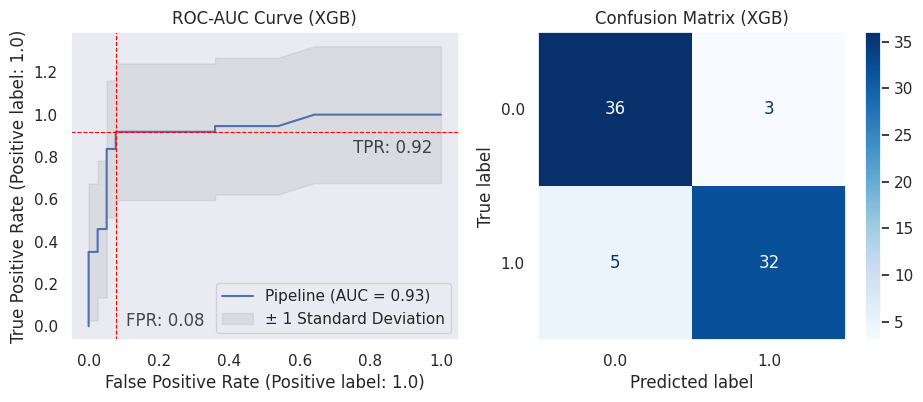

Accuracy: 0.8947
Precision: 0.9143
Recall: 0.8649
F1-Score: 0.8889


In [ ]:
# XGB
params = {'learning_rate': 0.03667004535589732,
          'n_estimators': 85,
          'max_depth': 1
         }

# XGB
model = XGBClassifier(**params)


# Instantiate the bagging classifier with SVM as the base estimator
xgb = make_pipeline(
    RobustScaler(),
    model
)


# Fit the bagging SVM on the training data
xgb.fit(X_train, y_train)

# Predict the labels for the test data
predictions = xgb.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Plot ROC Curve
fig, axs = plt.subplots(1, 2, figsize=(11, 4))
roc_auc = roc_auc_score(y_test, predictions)
roc_display = RocCurveDisplay.from_estimator(xgb, X_test, y_test, ax=axs[0])

# Calculate mean and standard deviation
mean_tpr = roc_display.tpr
std_tpr = np.std(roc_display.tpr)
mean_fpr = roc_display.fpr

optimal_tpr = mean_tpr[np.argmax(mean_tpr - mean_fpr)]
optimal_fpr = mean_fpr[np.argmax(mean_tpr - mean_fpr)]

# Plot vertical and horizontal red lines
axs[0].axhline(y=optimal_tpr, color='red',lw=0.8,linestyle='--')
axs[0].text(0.75, optimal_tpr - 0.1, f'TPR: {optimal_tpr:.2f}', color='black', alpha = 0.7)

axs[0].axvline(x=optimal_fpr, color='red',lw=0.8, linestyle='--')
axs[0].text(optimal_fpr + 0.03, 0, f'FPR: {optimal_fpr:.2f}', color='black', alpha = 0.7)

# Calculate upper and lower bounds for the shaded region
upper_tpr = (mean_tpr + std_tpr)
lower_tpr = np.maximum(mean_tpr - std_tpr, 0)

# Fill between the standard deviation bounds
axs[0].fill_between(mean_fpr, lower_tpr, upper_tpr, color='grey', alpha=0.15, label='± 1 Standard Deviation')
# Add text annotations for mean values
axs[0].grid(None)

# information
axs[0].legend(loc='lower right')
axs[0].set_title('ROC-AUC Curve (XGB)')

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test, ax=axs[1],cmap='Blues')
axs[1].set_title('Confusion Matrix (XGB)')
plt.grid(None)
plt.show()

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

info.append(['XGB',[accuracy,precision,recall,f1]])

### XGBoost Random Forest

In [ ]:
# XGBRF
xgbrf = AutoMLOptuna(X_train, X_test, y_train, y_test, models = ['XGB-RF'])
xgbrf.AutoML_test()

[I 2023-09-11 14:47:18,999] A new study created in memory with name: no-name-039938b2-8661-4e34-a86d-c0dbc3e9c4b0
[I 2023-09-11 14:47:19,465] Trial 0 finished with value: 0.7741463414634145 and parameters: {'scaler': 'standard', 'model_type': 'XGB-RF', 'eta': 0.0037949000562197497, 'max_depth': 7, 'subsample': 0.9465838764755055, 'colsample_bytree': 0.856613346001668, 'lambda': 4.419256101873906, 'alpha': 0.009922275283297132, 'gamma': 0.6739420812410274, 'min_child_weight': 1}. Best is trial 0 with value: 0.7741463414634145.
[I 2023-09-11 14:47:20,189] Trial 1 finished with value: 0.725609756097561 and parameters: {'scaler': 'minmax', 'model_type': 'XGB-RF', 'eta': 0.02108018917955483, 'max_depth': 7, 'subsample': 0.8137888922859701, 'colsample_bytree': 0.791057368190115, 'lambda': 8.687008229432042, 'alpha': 0.09868874681528211, 'gamma': 0.023842784595761293, 'min_child_weight': 10}. Best is trial 0 with value: 0.7741463414634145.
[W 2023-09-11 14:47:22,413] Trial 2 failed with param

KeyboardInterrupt: ignored

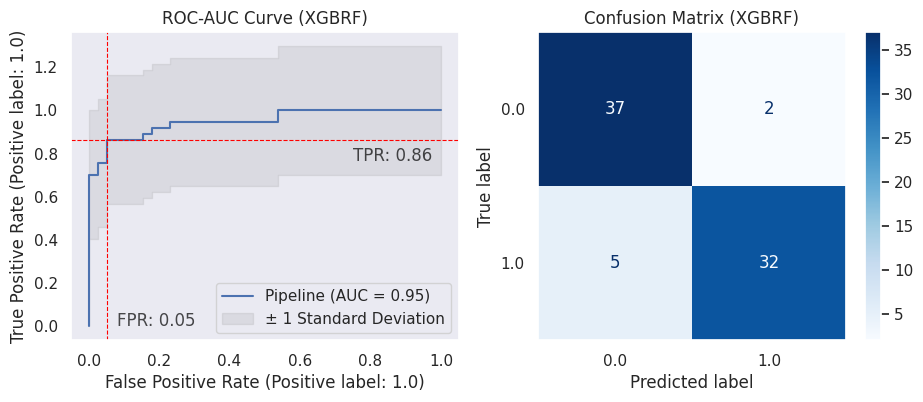

Accuracy: 0.9079
Precision: 0.9412
Recall: 0.8649
F1-Score: 0.9014


In [ ]:
# XGBRF
params = {'eta': 0.022719199542901573,
          'max_depth': 4,
          'subsample': 0.8427728211307876,
          'colsample_bytree': 0.6895333642526198,
          'lambda': 3.8850707331348966,
          'alpha': 0.30648104723156694,
          'gamma': 0.39625062098830505,
          'min_child_weight': 2
         }

# XGBRF
model = XGBRFClassifier(**params)


# Instantiate the bagging classifier with SVM as the base estimator
xgbrf = make_pipeline(
    MinMaxScaler(),
    model
)


# Fit the bagging SVM on the training data
xgbrf.fit(X_train, y_train)

# Predict the labels for the test data
predictions = xgbrf.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Plot ROC Curve
fig, axs = plt.subplots(1, 2, figsize=(11, 4))
roc_auc = roc_auc_score(y_test, predictions)
roc_display = RocCurveDisplay.from_estimator(xgbrf, X_test, y_test, ax=axs[0])

# Calculate mean and standard deviation
mean_tpr = roc_display.tpr
std_tpr = np.std(roc_display.tpr)
mean_fpr = roc_display.fpr

optimal_tpr = mean_tpr[np.argmax(mean_tpr - mean_fpr)]
optimal_fpr = mean_fpr[np.argmax(mean_tpr - mean_fpr)]

# Plot vertical and horizontal red lines
axs[0].axhline(y=optimal_tpr, color='red',lw=0.8,linestyle='--')
axs[0].text(0.75, optimal_tpr - 0.1, f'TPR: {optimal_tpr:.2f}', color='black', alpha = 0.7)

axs[0].axvline(x=optimal_fpr, color='red',lw=0.8, linestyle='--')
axs[0].text(optimal_fpr + 0.03, 0, f'FPR: {optimal_fpr:.2f}', color='black', alpha = 0.7)

# Calculate upper and lower bounds for the shaded region
upper_tpr = (mean_tpr + std_tpr)
lower_tpr = np.maximum(mean_tpr - std_tpr, 0)

# Fill between the standard deviation bounds
axs[0].fill_between(mean_fpr, lower_tpr, upper_tpr, color='grey', alpha=0.15, label='± 1 Standard Deviation')
# Add text annotations for mean values
axs[0].grid(None)

# information
axs[0].legend(loc='lower right')
axs[0].set_title('ROC-AUC Curve (XGBRF)')

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(xgbrf, X_test, y_test, ax=axs[1],cmap='Blues')
axs[1].set_title('Confusion Matrix (XGBRF)')
plt.grid(None)
plt.show()

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

info.append(['XGBRF',[accuracy,precision,recall,f1]])

### Random Forest

In [ ]:
# Random Forest
rf = AutoMLOptuna(X_train, X_test, y_train, y_test, models = ['RandomForest'])
rf.AutoML_test()

[I 2023-09-06 07:30:00,534] A new study created in memory with name: no-name-428c5edf-6a7e-4c6c-84ac-7518e19105e6
[I 2023-09-06 07:30:07,796] Trial 0 finished with value: 0.8084146341463414 and parameters: {'scaler': 'minmax', 'model_type': 'RandomForest', 'n_estimators': 534, 'max_depth': 10}. Best is trial 0 with value: 0.8084146341463414.
[I 2023-09-06 07:30:11,470] Trial 1 finished with value: 0.7986585365853658 and parameters: {'scaler': 'minmax', 'model_type': 'RandomForest', 'n_estimators': 304, 'max_depth': 10}. Best is trial 0 with value: 0.8084146341463414.
[I 2023-09-06 07:30:17,029] Trial 2 finished with value: 0.7986585365853658 and parameters: {'scaler': 'robust', 'model_type': 'RandomForest', 'n_estimators': 424, 'max_depth': 10}. Best is trial 0 with value: 0.8084146341463414.
[I 2023-09-06 07:30:27,083] Trial 3 finished with value: 0.7986585365853658 and parameters: {'scaler': 'minmax', 'model_type': 'RandomForest', 'n_estimators': 833, 'max_depth': 4}. Best is trial 0



Best parameters:  {'scaler': 'minmax', 'model_type': 'RandomForest', 'n_estimators': 185, 'max_depth': 9}
Best cross-validation score: 0.78890
Accuracy on test data: 0.92105
Precision: 0.91892
Recall 0.91892
F1-score 0.91892
Runtime: 1503.8530 sec


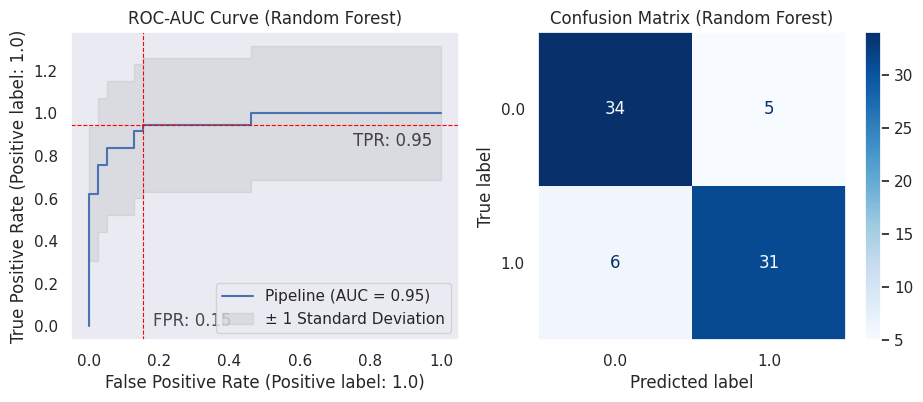

Accuracy: 0.8553
Precision: 0.8611
Recall: 0.8378
F1-Score: 0.8493


In [ ]:
# Random Forest
params = { 'n_estimators': 185,
           'max_depth': 9
         }

model = RandomForestClassifier(**params)


# Instantiate the bagging classifier with SVM as the base estimator
rf = make_pipeline(
    MinMaxScaler(),
    model
)


# Fit the bagging SVM on the training data
rf.fit(X_train, y_train)

# Predict the labels for the test data
predictions = rf.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Plot ROC Curve
fig, axs = plt.subplots(1, 2, figsize=(11, 4))
roc_auc = roc_auc_score(y_test, predictions)
roc_display = RocCurveDisplay.from_estimator(rf, X_test, y_test, ax=axs[0])

# Calculate mean and standard deviation
mean_tpr = roc_display.tpr
std_tpr = np.std(roc_display.tpr)
mean_fpr = roc_display.fpr

optimal_tpr = mean_tpr[np.argmax(mean_tpr - mean_fpr)]
optimal_fpr = mean_fpr[np.argmax(mean_tpr - mean_fpr)]

# Plot vertical and horizontal red lines
axs[0].axhline(y=optimal_tpr, color='red',lw=0.8,linestyle='--')
axs[0].text(0.75, optimal_tpr - 0.1, f'TPR: {optimal_tpr:.2f}', color='black', alpha = 0.7)

axs[0].axvline(x=optimal_fpr, color='red',lw=0.8, linestyle='--')
axs[0].text(optimal_fpr + 0.03, 0, f'FPR: {optimal_fpr:.2f}', color='black', alpha = 0.7)

# Calculate upper and lower bounds for the shaded region
upper_tpr = (mean_tpr + std_tpr)
lower_tpr = np.maximum(mean_tpr - std_tpr, 0)

# Fill between the standard deviation bounds
axs[0].fill_between(mean_fpr, lower_tpr, upper_tpr, color='grey', alpha=0.15, label='± 1 Standard Deviation')
# Add text annotations for mean values
axs[0].grid(None)

# information
axs[0].legend(loc='lower right')
axs[0].set_title('ROC-AUC Curve (Random Forest)')

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, ax=axs[1], cmap='Blues')
axs[1].set_title('Confusion Matrix (Random Forest)')
plt.grid(None)
plt.show()

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

info.append(['Random Forest',[accuracy,precision,recall,f1]])

### Gradient Boosting

In [ ]:
# GBM
gbm = AutoMLOptuna(X_train, X_test, y_train, y_test, models = ['GBM'])
gbm.AutoML_test()

[I 2023-09-11 06:15:02,270] A new study created in memory with name: no-name-f344d765-f2d5-488c-8002-a5d1d6e9c1c9
[I 2023-09-11 06:15:11,699] Trial 0 finished with value: 0.7006097560975609 and parameters: {'scaler': 'minmax', 'model_type': 'GBM', 'learning_rate': 0.033594215446548316, 'n_estimators': 680, 'max_depth': 19}. Best is trial 0 with value: 0.7006097560975609.
[I 2023-09-11 06:15:13,677] Trial 1 finished with value: 0.7789024390243903 and parameters: {'scaler': 'minmax', 'model_type': 'GBM', 'learning_rate': 0.006212838455043508, 'n_estimators': 878, 'max_depth': 1}. Best is trial 1 with value: 0.7789024390243903.
[I 2023-09-11 06:15:20,169] Trial 2 finished with value: 0.7007317073170731 and parameters: {'scaler': 'robust', 'model_type': 'GBM', 'learning_rate': 0.00010602957796510385, 'n_estimators': 950, 'max_depth': 7}. Best is trial 1 with value: 0.7789024390243903.
[I 2023-09-11 06:15:24,326] Trial 3 finished with value: 0.7054878048780487 and parameters: {'scaler': 'st



Best parameters:  {'scaler': 'standard', 'model_type': 'GBM', 'learning_rate': 0.009644210162191936, 'n_estimators': 359, 'max_depth': 1}
Best cross-validation score: 0.80841
Accuracy on test data: 0.89474
Precision: 0.91429
Recall 0.86486
F1-score 0.88889
Runtime: 395.7883 sec


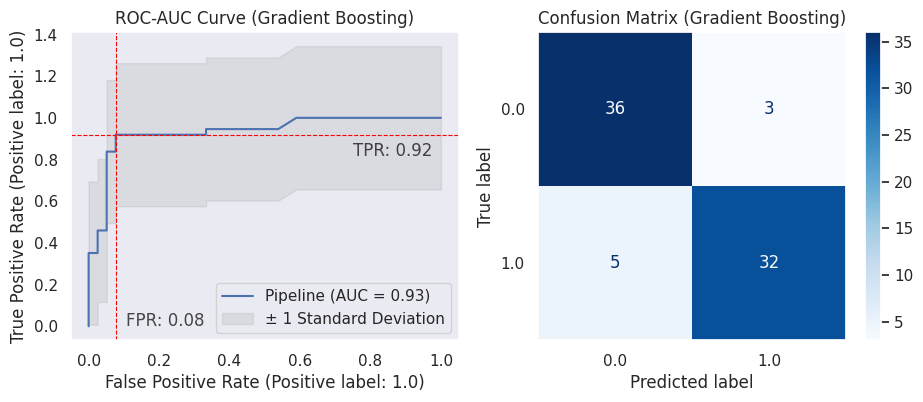

Accuracy: 0.8947
Precision: 0.9143
Recall: 0.8649
F1-Score: 0.8889


In [ ]:
# Gradient Boosting
params = { 'learning_rate': 0.009644210162191936,
           'n_estimators': 359,
           'max_depth': 1
         }

model = GradientBoostingClassifier(**params)


pipeline = make_pipeline(
    StandardScaler(),
    model
)


# Fit the bagging SVM on the training data
pipeline.fit(X_train, y_train)

# Predict the labels for the test data
predictions = pipeline.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Plot ROC Curve
fig, axs = plt.subplots(1, 2, figsize=(11, 4))
roc_auc = roc_auc_score(y_test, predictions)
roc_display = RocCurveDisplay.from_estimator(pipeline, X_test, y_test, ax=axs[0])

# Calculate mean and standard deviation
mean_tpr = roc_display.tpr
std_tpr = np.std(roc_display.tpr)
mean_fpr = roc_display.fpr

optimal_tpr = mean_tpr[np.argmax(mean_tpr - mean_fpr)]
optimal_fpr = mean_fpr[np.argmax(mean_tpr - mean_fpr)]

# Plot vertical and horizontal red lines
axs[0].axhline(y=optimal_tpr, color='red',lw=0.8,linestyle='--')
axs[0].text(0.75, optimal_tpr - 0.1, f'TPR: {optimal_tpr:.2f}', color='black', alpha = 0.7)

axs[0].axvline(x=optimal_fpr, color='red',lw=0.8, linestyle='--')
axs[0].text(optimal_fpr + 0.03, 0, f'FPR: {optimal_fpr:.2f}', color='black', alpha = 0.7)

# Calculate upper and lower bounds for the shaded region
upper_tpr = (mean_tpr + std_tpr)
lower_tpr = np.maximum(mean_tpr - std_tpr, 0)

# Fill between the standard deviation bounds
axs[0].fill_between(mean_fpr, lower_tpr, upper_tpr, color='grey', alpha=0.15, label='± 1 Standard Deviation')
# Add text annotations for mean values
axs[0].grid(None)

# information
axs[0].legend(loc='lower right')
axs[0].set_title('ROC-AUC Curve (Gradient Boosting)')

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, ax=axs[1], cmap='Blues')
axs[1].set_title('Confusion Matrix (Gradient Boosting)')
plt.grid(None)
plt.show()

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

info.append(['Gradient Boosting',[accuracy,precision,recall,f1]])

### AdaBoost

In [ ]:
# AdaBoost
ab = AutoMLOptuna(X_train, X_test, y_train, y_test, models = ['AdaBoost'])
ab.AutoML_test()

[I 2023-09-11 06:31:52,727] A new study created in memory with name: no-name-422bbe8f-26b8-456f-ac80-91dcea91dc13
[W 2023-09-11 06:39:00,649] Trial 0 failed with parameters: {'scaler': 'robust', 'model_type': 'AdaBoost', 'n_estimators': 593, 'learning_rate': 0.00804335738866113, 'base_estimator': 'random_forest', 'n_estimators_rf': 284, 'max_depth_rf': 3} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-9-82a2b8788674>", line 192, in objective
    scores = cross_val_score(model, self.X_train, self.y_train, cv=5, scoring=scorer)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 515, in cross_val_score
    cv_results = cross_validate(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 266, in cross_validate
  

KeyboardInterrupt: ignored

### Decision Trees

In [ ]:
# DecisionTree
dt = AutoMLOptuna(X_train, X_test, y_train, y_test, models = ['DecisionTree'])
dt.AutoML_test()

[I 2023-09-11 06:54:48,068] A new study created in memory with name: no-name-edfe340d-448a-4f95-bf7c-e4ce39ef9d40
[I 2023-09-11 06:54:48,150] Trial 0 finished with value: 0.7056097560975609 and parameters: {'scaler': 'minmax', 'model_type': 'DecisionTree', 'max_depth': 4, 'min_samples_split': 0.29659886784607536, 'min_samples_leaf': 0.10342392784049098}. Best is trial 0 with value: 0.7056097560975609.
[I 2023-09-11 06:54:48,224] Trial 1 finished with value: 0.725609756097561 and parameters: {'scaler': 'robust', 'model_type': 'DecisionTree', 'max_depth': 28, 'min_samples_split': 0.7747930209725729, 'min_samples_leaf': 0.2659298469161531}. Best is trial 1 with value: 0.725609756097561.
[I 2023-09-11 06:54:48,301] Trial 2 finished with value: 0.725609756097561 and parameters: {'scaler': 'standard', 'model_type': 'DecisionTree', 'max_depth': 8, 'min_samples_split': 0.11272143318661988, 'min_samples_leaf': 0.39405638221045924}. Best is trial 1 with value: 0.725609756097561.
[I 2023-09-11 06



Best parameters:  {'scaler': 'standard', 'model_type': 'DecisionTree', 'max_depth': 25, 'min_samples_split': 0.4396815647043719, 'min_samples_leaf': 0.41833973413307823}
Best cross-validation score: 0.73537
Accuracy on test data: 0.76316
Precision: 0.77143
Recall 0.72973
F1-score 0.75000
Runtime: 32.0913 sec


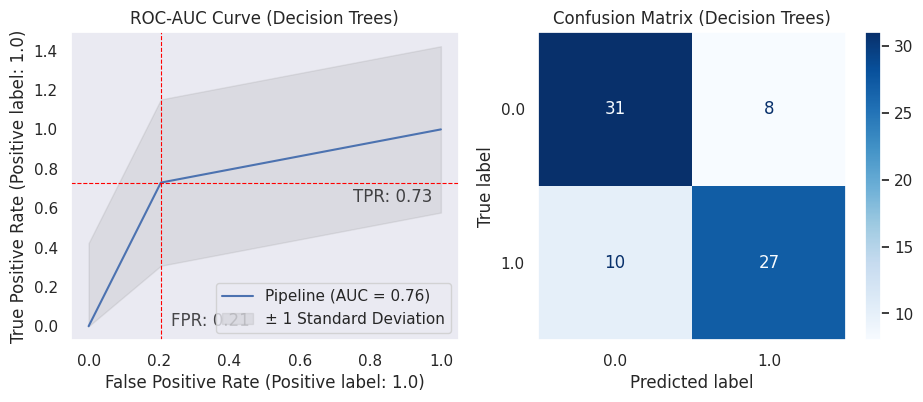

Accuracy: 0.7632
Precision: 0.7714
Recall: 0.7297
F1-Score: 0.7500


NameError: ignored

In [ ]:
# Decision Trees
params = {'max_depth': 25,
          'min_samples_split': 0.4396815647043719,
          'min_samples_leaf': 0.41833973413307823
         }

model = DecisionTreeClassifier(**params)


pipeline = make_pipeline(
    StandardScaler(),
    model
)


# Fit the bagging SVM on the training data
pipeline.fit(X_train, y_train)

# Predict the labels for the test data
predictions = pipeline.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Plot ROC Curve
fig, axs = plt.subplots(1, 2, figsize=(11, 4))
roc_auc = roc_auc_score(y_test, predictions)
roc_display = RocCurveDisplay.from_estimator(pipeline, X_test, y_test, ax=axs[0])

# Calculate mean and standard deviation
mean_tpr = roc_display.tpr
std_tpr = np.std(roc_display.tpr)
mean_fpr = roc_display.fpr

optimal_tpr = mean_tpr[np.argmax(mean_tpr - mean_fpr)]
optimal_fpr = mean_fpr[np.argmax(mean_tpr - mean_fpr)]

# Plot vertical and horizontal red lines
axs[0].axhline(y=optimal_tpr, color='red',lw=0.8,linestyle='--')
axs[0].text(0.75, optimal_tpr - 0.1, f'TPR: {optimal_tpr:.2f}', color='black', alpha = 0.7)

axs[0].axvline(x=optimal_fpr, color='red',lw=0.8, linestyle='--')
axs[0].text(optimal_fpr + 0.03, 0, f'FPR: {optimal_fpr:.2f}', color='black', alpha = 0.7)

# Calculate upper and lower bounds for the shaded region
upper_tpr = (mean_tpr + std_tpr)
lower_tpr = np.maximum(mean_tpr - std_tpr, 0)

# Fill between the standard deviation bounds
axs[0].fill_between(mean_fpr, lower_tpr, upper_tpr, color='grey', alpha=0.15, label='± 1 Standard Deviation')
# Add text annotations for mean values
axs[0].grid(None)

# information
axs[0].legend(loc='lower right')
axs[0].set_title('ROC-AUC Curve (Decision Trees)')

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, ax=axs[1], cmap='Blues')
axs[1].set_title('Confusion Matrix (Decision Trees)')
plt.grid(None)
plt.show()

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

info.append(['Decision Trees',[accuracy,precision,recall,f1]])

### Logistic Regression

In [ ]:
# LogisticRegression
lg = AutoMLOptuna(X_train, X_test, y_train, y_test, models = ['LogisticRegression'])
lg.AutoML_test()

[I 2023-09-11 14:42:41,270] A new study created in memory with name: no-name-1d1f7e67-1b87-414d-ad7a-73aef80368dc
[I 2023-09-11 14:42:41,429] Trial 0 finished with value: 0.7840243902439024 and parameters: {'scaler': 'robust', 'model_type': 'LogisticRegression', 'penalty': 'l2', 'Logistic-regularization': 10.798693434880818}. Best is trial 0 with value: 0.7840243902439024.
[I 2023-09-11 14:42:41,555] Trial 1 finished with value: 0.5490243902439025 and parameters: {'scaler': 'robust', 'model_type': 'LogisticRegression', 'penalty': 'l1', 'Logistic-regularization': 0.028852528031123825}. Best is trial 0 with value: 0.7840243902439024.
[I 2023-09-11 14:42:41,705] Trial 2 finished with value: 0.7840243902439024 and parameters: {'scaler': 'standard', 'model_type': 'LogisticRegression', 'penalty': 'l1', 'Logistic-regularization': 17.400719113024888}. Best is trial 0 with value: 0.7840243902439024.
[I 2023-09-11 14:42:41,874] Trial 3 finished with value: 0.7840243902439024 and parameters: {'sc



Best parameters:  {'scaler': 'robust', 'model_type': 'LogisticRegression', 'penalty': 'l2', 'Logistic-regularization': 0.030253701962924134}
Best cross-validation score: 0.81329
Accuracy on test data: 0.93421
Precision: 1.00000
Recall 0.86486
F1-score 0.92754
Runtime: 46.5950 sec


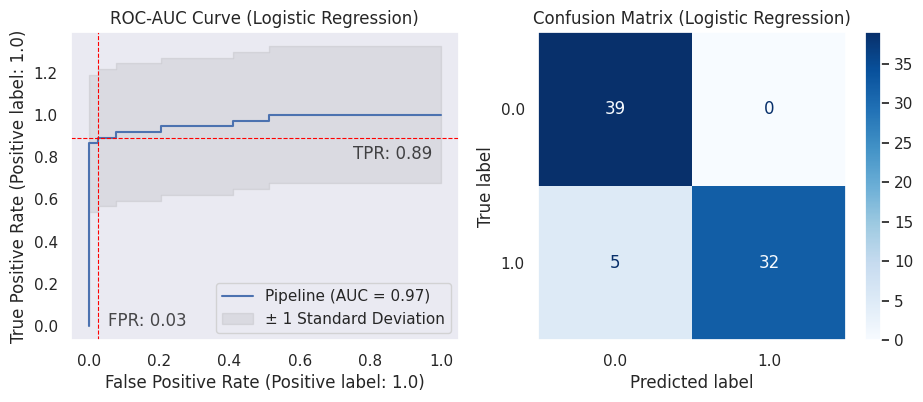

Accuracy: 0.9342
Precision: 1.0000
Recall: 0.8649
F1-Score: 0.9275


In [ ]:
# Logistic Regression
params = {'penalty': 'l2',
          'C': 0.030253701962924134,
          'solver':'lbfgs'
         }

model = LogisticRegression(**params)


pipeline = make_pipeline(
    RobustScaler(),
    model
)


# Fit the bagging SVM on the training data
pipeline.fit(X_train, y_train)

# Predict the labels for the test data
predictions = pipeline.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Plot ROC Curve
fig, axs = plt.subplots(1, 2, figsize=(11, 4))
roc_auc = roc_auc_score(y_test, predictions)
roc_display = RocCurveDisplay.from_estimator(pipeline, X_test, y_test, ax=axs[0])

# Calculate mean and standard deviation
mean_tpr = roc_display.tpr
std_tpr = np.std(roc_display.tpr)
mean_fpr = roc_display.fpr

optimal_tpr = mean_tpr[np.argmax(mean_tpr - mean_fpr)]
optimal_fpr = mean_fpr[np.argmax(mean_tpr - mean_fpr)]

# Plot vertical and horizontal red lines
axs[0].axhline(y=optimal_tpr, color='red',lw=0.8,linestyle='--')
axs[0].text(0.75, optimal_tpr - 0.1, f'TPR: {optimal_tpr:.2f}', color='black', alpha = 0.7)

axs[0].axvline(x=optimal_fpr, color='red',lw=0.8, linestyle='--')
axs[0].text(optimal_fpr + 0.03, 0, f'FPR: {optimal_fpr:.2f}', color='black', alpha = 0.7)

# Calculate upper and lower bounds for the shaded region
upper_tpr = (mean_tpr + std_tpr)
lower_tpr = np.maximum(mean_tpr - std_tpr, 0)

# Fill between the standard deviation bounds
axs[0].fill_between(mean_fpr, lower_tpr, upper_tpr, color='grey', alpha=0.15, label='± 1 Standard Deviation')
# Add text annotations for mean values
axs[0].grid(None)

# information
axs[0].legend(loc='lower right')
axs[0].set_title('ROC-AUC Curve (Logistic Regression)')

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, ax=axs[1], cmap='Blues')
axs[1].set_title('Confusion Matrix (Logistic Regression)')
plt.grid(None)
plt.show()

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

info.append(['Logistic Regression',[accuracy,precision,recall,f1]])

In [ ]:
# add Ideal case
info.append(['Ideal',[1,1,1,1]])

In [ ]:
models = [model_name[0] for model_name in info]
prec = [precision[1][1] for precision in info]
recall = [recall[1][2] for recall in info]
accuracy = [accuracy[1][0] for accuracy in info]
f1 = [f1[1][3] for f1 in info]

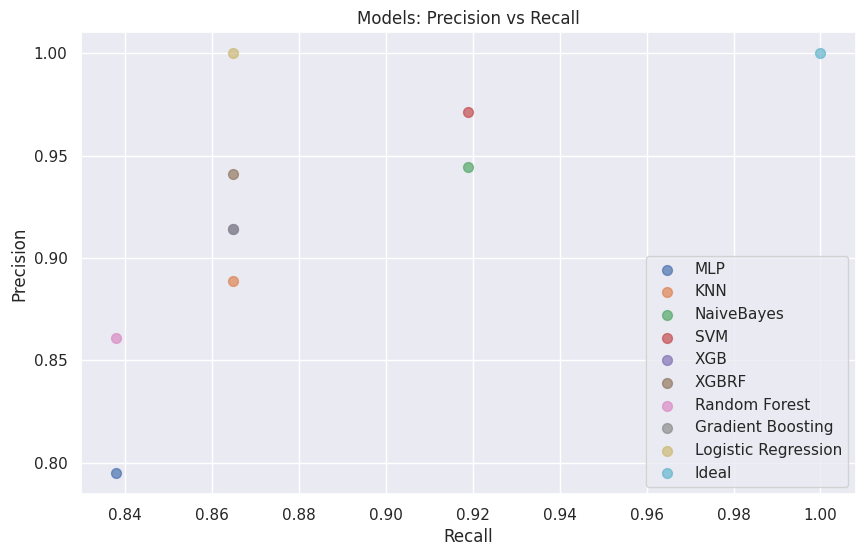

In [ ]:
# Create a scatter plot with different colors for each model
plt.figure(figsize=(10, 6))
for i in range(len(models)):
    plt.scatter(recall[i], prec[i], label=models[i], s=50, alpha = 0.7)

# Add labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Models: Precision vs Recall')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

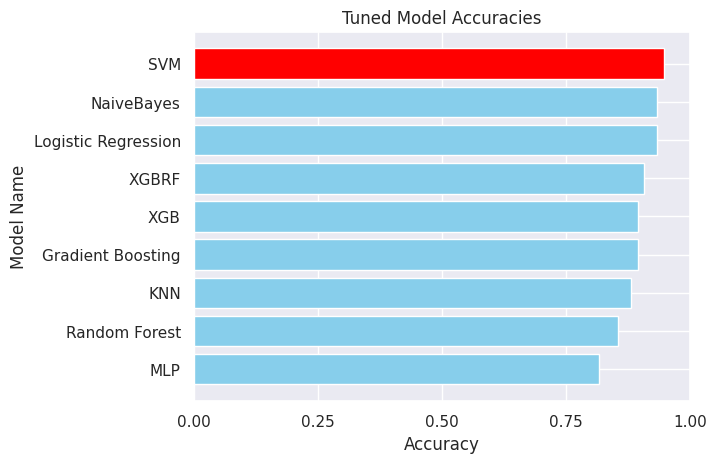

In [ ]:
# Sort the data based on accuracies
sorted_data = sorted(zip(accuracy, models), reverse=False)
sorted_accuracies, sorted_model_names = zip(*sorted_data)

# Create a list of colors for the bars
colors = ['skyblue'] * len(sorted_accuracies)
colors[-2] = 'red'  # Set a different color for the highest accuracy bar

# Create a horizontal bar chart
plt.barh(sorted_model_names[:-1], sorted_accuracies[:-1], color=colors)

# Set labels and title
plt.xlabel('Accuracy')
plt.ylabel('Model Name')
plt.title('Tuned Model Accuracies')

plt.gca().set_xticks([0.00, 0.25, 0.50, 0.75, 1.00])  # Set desired x-axis ticks

# Show the chart
plt.show()

### Bagging-SVC

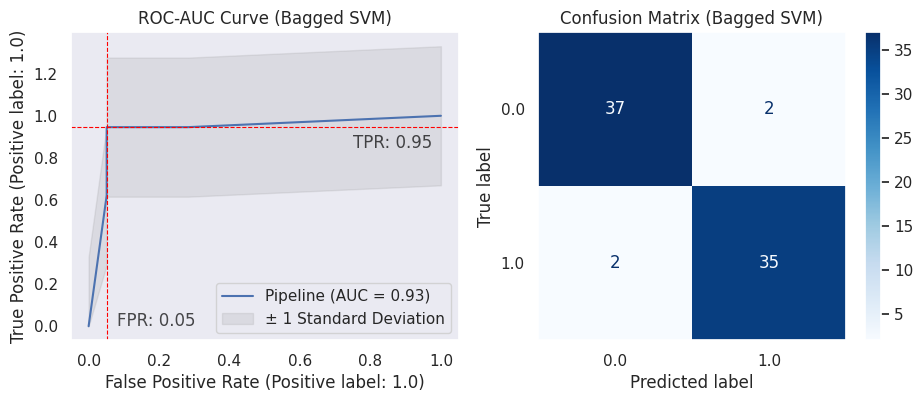

Accuracy: 0.9474
Precision: 0.9459
Recall: 0.9459
F1-Score: 0.9459


In [ ]:
# Instantiate the base SVM estimator
params = { 'C': 0.01204566445947836,
           'gamma': 0.008166319014156912,
           'kernel': 'linear'
         }

bc = BaggingClassifier(estimator=SVC(), n_estimators=7, random_state=42, n_jobs = -1)

# Instantiate the bagging classifier with SVM as the base estimator
bagging_svm = make_pipeline(
    StandardScaler(),
    bc
)


# Fit the bagging SVM on the training data
bagging_svm.fit(X_train, y_train)

# Predict the labels for the test data
predictions = bagging_svm.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Plot ROC Curve
fig, axs = plt.subplots(1, 2, figsize=(11, 4))
roc_auc = roc_auc_score(y_test, predictions)
roc_display = RocCurveDisplay.from_estimator(bagging_svm, X_test, y_test, ax=axs[0])

# Calculate mean and standard deviation
mean_tpr = roc_display.tpr
std_tpr = np.std(roc_display.tpr)
mean_fpr = roc_display.fpr

optimal_tpr = mean_tpr[np.argmax(mean_tpr - mean_fpr)]
optimal_fpr = mean_fpr[np.argmax(mean_tpr - mean_fpr)]

# Plot vertical and horizontal red lines
axs[0].axhline(y=optimal_tpr, color='red',lw=0.8,linestyle='--')
axs[0].text(0.75, optimal_tpr - 0.1, f'TPR: {optimal_tpr:.2f}', color='black', alpha = 0.7)

axs[0].axvline(x=optimal_fpr, color='red',lw=0.8, linestyle='--')
axs[0].text(optimal_fpr + 0.03, 0, f'FPR: {optimal_fpr:.2f}', color='black', alpha = 0.7)

# Calculate upper and lower bounds for the shaded region
upper_tpr = (mean_tpr + std_tpr)
lower_tpr = np.maximum(mean_tpr - std_tpr, 0)

# Fill between the standard deviation bounds
axs[0].fill_between(mean_fpr, lower_tpr, upper_tpr, color='grey', alpha=0.15, label='± 1 Standard Deviation')
# Add text annotations for mean values
axs[0].grid(None)

# information
axs[0].legend(loc='lower right')
axs[0].set_title('ROC-AUC Curve (Bagged SVM)')

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(bagging_svm, X_test, y_test, ax=axs[1], cmap='Blues')
axs[1].set_title('Confusion Matrix (Bagged SVM)')
plt.grid(None)
plt.show()

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

## SHAP

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 5.2 MB/s eta 0:00:00


### SVM

  0%|          | 0/76 [00:00<?, ?it/s]

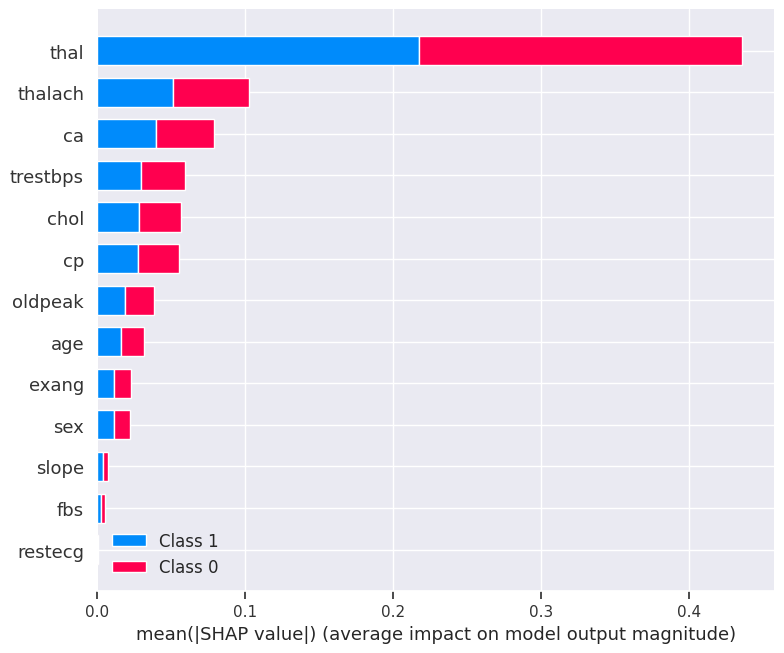

In [ ]:
import shap
params = { 'C': 0.007735050217239773,
           'gamma': 0.008166319014156912,
           'kernel': 'linear',
           'probability' : True
         }

base_estimator = SVC(**params)
base_estimator.fit(X_train, y_train)

# explain all the predictions in the test set
explainer = shap.KernelExplainer(base_estimator.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)

# Plot the feature importance using SHAP
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = COLUMN_NAMES[:-1])


### Naive Bayes

  0%|          | 0/76 [00:00<?, ?it/s]

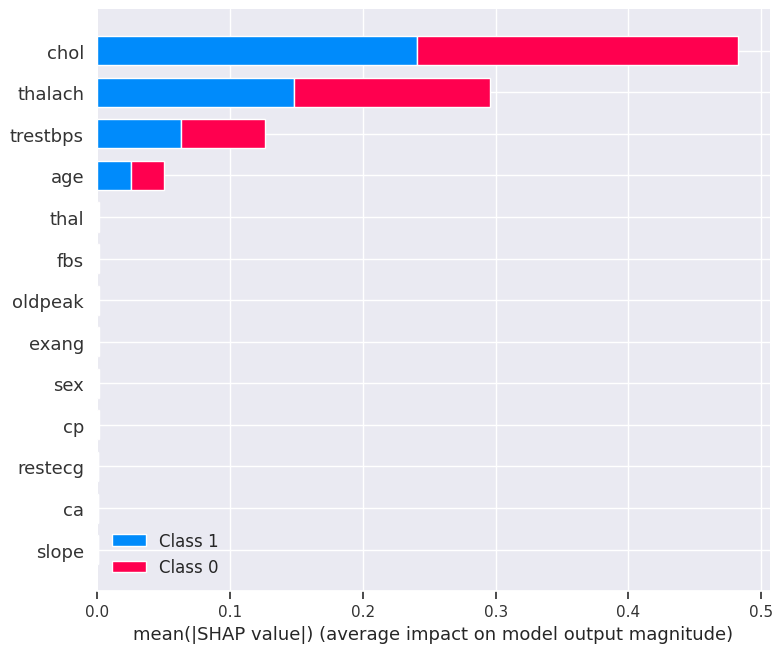

In [ ]:
model = GaussianNB()

# Instantiate the bagging classifier with SVM as the base estimator
pipeline = make_pipeline(
    RobustScaler(),
    model
)

pipeline.fit(X_train, y_train)

# explain all the predictions in the test set
explainer = shap.KernelExplainer(model.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)

# Plot the feature importance using SHAP
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = COLUMN_NAMES[:-1])
